In [1]:
%matplotlib inline
from brian2 import *
prefs.codegen.target = 'numpy'

## Synapses

In [8]:
# Regular spiking cells (will be useful as stimulation for other neurons later)
start_scope()

input_spikes = SpikeGeneratorGroup(10,np.arange(10),np.arange(10)*ms,period = 10*ms) # 10 neurons, indexes of the neurons that should spike, times that the spikes occur, period repeats spike pattern every 10ms

Cm = 200*pF
E_L = -70*mV
f= 100*Hz

eqs = '''
dVm/dt = 1/Cm * (I_inj + g_L * (E_L - Vm)) : volt (unless refractory)
g_L : siemens
I_inj = 0*nA : amp 
'''
# The unless refractory says clamp Vm and don't follow eqns during refractory period

group = NeuronGroup(18,eqs, threshold='Vm> -45*mV',reset = 'Vm = E_L',refractory=5*ms)
group.Vm = E_L
group.g_L = '10*nS + rand()*5*nS'

syn = Synapses(input_spikes,group,'w : volt',on_pre='Vm_post += w') # spikes to put in, which group of neurons, synapse model (direct change in postsynapstic voltage potential), define when to do something when presynaptic synapse spikes
syn.connect() # how to connect synapses (lots of ways to do this)
syn.w = '1*mV + rand()*4*mV'
syn.delay = '1*ms + rand()*5*ms'

mon = StateMonitor(group, 'Vm', record=True) #monitor the membrane voltage
spike_mon = SpikeMonitor(input_spikes)
run(100*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup_2', using method 'exact' (took 0.11s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


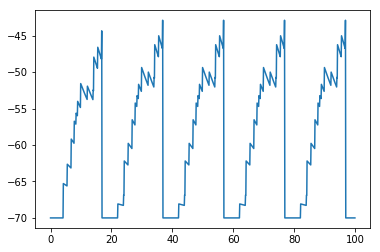

In [9]:
plt.plot(mon.t/ms, mon.Vm[1]/mV)

In [ ]:
# Simple synaptic connection
start_scope()

In [ ]:
plt.plot(mon.t/ms, mon.V_m.T/mV);

In [ ]:
# Simple synaptic connection
start_scope()

### [Exercise: synaptic delays]

With all-to-all connectivity and the temporal stimulation pattern from above: how would you set the synaptic delays to get the most efficient post-synaptic stimulation?